In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [19]:
from keras.models import load_model

model=load_model("/content/drive/MyDrive/model-010.model")

In [20]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [50]:
#analysis will be done according to the predicted output
def emotion_analysis(emotions):
  objects = ('neutral', 'happy', 'sad', 'surprise', 'fear', 'angry', 'disgust')
  y_pos = np.arange(len(objects))

  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')

  res=(max(emotions))
  j=0
  for i in emotions:
    if(i==res):
      break
    else:
      j=j+1
  Emotion=str(objects[j])
  print('Emotion Detected : ' + Emotion)
  print('Accuracy : '+ str(res*100))
  plt.show()
  return Emotion


In [51]:
#cropping of face is done using cascade classifier to predict the emotion
def facecrop(image):
  facedata = "/content/drive/MyDrive/haarcascade_frontalface_default.xml"
  cascade = cv2.CascadeClassifier(facedata)
  img = cv2.imread(image)
  try:
    minisize = (img.shape[1],img.shape[0])
    miniframe = cv2.resize(img, minisize)
    faces = cascade.detectMultiScale(miniframe)
    for f in faces:
      x, y, w, h = [ v for v in f ]
      cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
      sub_face = img[y:y+h, x:x+w]
      cv2.imwrite('/content/drive/MyDrive/capture.jpg', sub_face)
      #print ("Writing: " + image)
  except Exception as e:
    print (e)
    #cv2.imshow(image, img)


In [52]:
#pip install spotipy==2.19.0

In [53]:
#pip install urllib3==1.26.6

In [38]:
#pip install requests==2.26.0

In [54]:
#using spotify api
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="0a57e18464f747a29ed1210abd8a785e", client_secret="b197b139197a470784713aa3e3b9f0bc"))
playlist_limit = 5
song_limit_per_playlist = 20

def songs_by_emotion(emotion):
  results = sp.search(q=emotion,type='playlist', limit=playlist_limit)
  gs = []
  for el in results['playlists']['items']:
    temp = {}
    temp['playlist_name'] = el['name']
    temp['playlist_href'] = el['href']
    temp['playlist_id'] = el['id']
    temp['playlist_spotify_link'] = el['external_urls']['spotify']
    gs.append(temp)
  fnl_playlist_songs = gs
  for i in range(0,len(gs)):
    res = sp.playlist(playlist_id = gs[i]['playlist_id'])
    srn = res['tracks']['items'][0:song_limit_per_playlist]
    tlist = []
    for el in srn:
      tlist.append(el['track']['name'])
      fnl_playlist_songs[i]['playlist_songs'] = tlist
  return fnl_playlist_songs



In [55]:
def print_songs(fnl_playlist_songs):
  for el in fnl_playlist_songs:
    print('playlist_name : ' + str(el['playlist_name']))
    print('playlist_href : ' + str(el['playlist_href']))
    print('playlist_spotify_link : ' + str(el['playlist_spotify_link']))
    print('playlist_songs : ' )
    for i in range(0,len(el['playlist_songs'])):
      print(str(i+1) + ') ' + el['playlist_songs'][i])
    print('-----------------------------------------------')

In [56]:
#pip install --upgrade spotipy --user

In [58]:
#predicting emotion from the picture given
def predictemo(facepath):
  facecrop(facepath)
  file = '/content/drive/MyDrive/capture.jpg'
  true_image = image.load_img(file)
  img = image.load_img(file, grayscale=True, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  custom = model.predict(x)
  final_Emotion=emotion_analysis(custom[0])
  x = np.array(x, 'float32')
  x = x.reshape([64, 64]);
  plt.gray()
  plt.imshow(true_image)
  plt.show()
  print('\n------------------------------------------------------------------\n')
  print('Playlists Generated By Using The Emotion : ' + final_Emotion)
  print('\n------------------------------------------------------------------\n')
  final_list = songs_by_emotion(final_Emotion)
  print_songs(final_list)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Emotion Detected : happy
Accuracy : 91.9270396232605


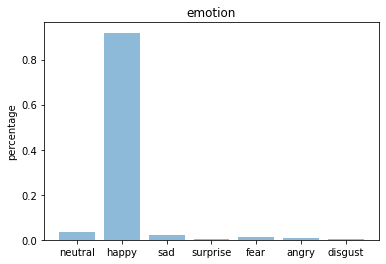

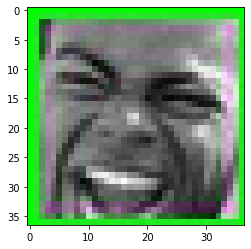


------------------------------------------------------------------

Playlists Generated By Using The Emotion : happy

------------------------------------------------------------------

playlist_name : Happy Hits!
playlist_href : https://api.spotify.com/v1/playlists/37i9dQZF1DXdPec7aLTmlC
playlist_spotify_link : https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC
playlist_songs : 
1) Shivers
2) Follow Me
3) Heartbreak Anthem (with David Guetta & Little Mix)
4) Sunshine
5) Summer of Love (Shawn Mendes & Tainy)
6) Anyone
7) The Best Days (feat. Tabitha)
8) You for Me
9) Cloudy Day
10) Don’t Wake Me Up
11) Run
12) Love Me Now (feat. Zoe Wees)
13) At Least I Had Fun
14) Friends
15) Love You Better
16) Pick Me Up
17) Remember
18) Lasting Lover
19) Dive
20) Good Vibes
-----------------------------------------------
playlist_name : Happy Beats
playlist_href : https://api.spotify.com/v1/playlists/37i9dQZF1DWSf2RDTDayIx
playlist_spotify_link : https://open.spotify.com/playlist/37i9dQZF1DW

In [59]:
#predict image1
predictemo('/content/drive/MyDrive/test.jpg')

Emotion Detected : happy
Accuracy : 96.22507691383362


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


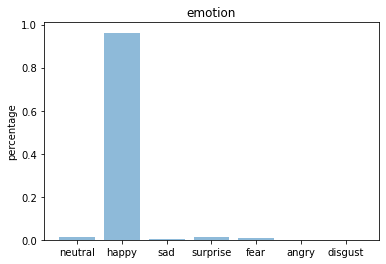

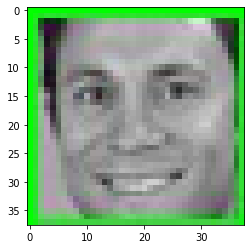


------------------------------------------------------------------

Playlists Generated By Using The Emotion : happy

------------------------------------------------------------------

playlist_name : Happy Hits!
playlist_href : https://api.spotify.com/v1/playlists/37i9dQZF1DXdPec7aLTmlC
playlist_spotify_link : https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC
playlist_songs : 
1) Shivers
2) Follow Me
3) Heartbreak Anthem (with David Guetta & Little Mix)
4) Sunshine
5) Summer of Love (Shawn Mendes & Tainy)
6) Anyone
7) The Best Days (feat. Tabitha)
8) You for Me
9) Cloudy Day
10) Don’t Wake Me Up
11) Run
12) Love Me Now (feat. Zoe Wees)
13) At Least I Had Fun
14) Friends
15) Love You Better
16) Pick Me Up
17) Remember
18) Lasting Lover
19) Dive
20) Good Vibes
-----------------------------------------------
playlist_name : Happy Beats
playlist_href : https://api.spotify.com/v1/playlists/37i9dQZF1DWSf2RDTDayIx
playlist_spotify_link : https://open.spotify.com/playlist/37i9dQZF1DW

In [60]:
#predict the emotion from image 2
predictemo('/content/drive/MyDrive/test1.jpg')

Emotion Detected : neutral
Accuracy : 64.31741118431091


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


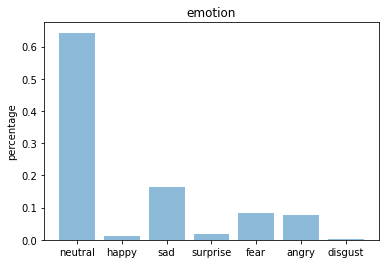

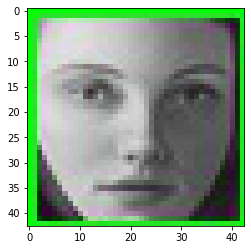


------------------------------------------------------------------

Playlists Generated By Using The Emotion : neutral

------------------------------------------------------------------

playlist_name : Neutrale Musik
playlist_href : https://api.spotify.com/v1/playlists/0kz9A7VDGq60az4j8tLPan
playlist_spotify_link : https://open.spotify.com/playlist/0kz9A7VDGq60az4j8tLPan
playlist_songs : 
1) Please Don't Lie
2) Can't Hold Us (feat. Ray Dalton)
3) Summer Air
4) Whistle
5) Summer Jam
6) Too Close
7) One Day / Reckoning Song (Wankelmut Remix) [Radio Edit]
8) Thrift Shop (feat. Wanz)
9) Scream & Shout
10) Hangover
11) DJ Got Us Fallin' In Love (feat. Pitbull)
12) And We Danced (feat. Ziggy Stardust)
13) I Gotta Feeling
14) There She Goes
15) Good Feeling
16) TiK ToK
17) Summer Paradise (feat. Sean Paul) - Single Version
18) Dynamite
19) Moves Like Jagger - Studio Recording From "The Voice" Performance
20) Alors on danse - Radio Edit
-----------------------------------------------
playli

In [61]:
#predict the emotion from the image 3
predictemo('/content/drive/MyDrive/test2.jpg')